# FIR滤波器结构：级联型

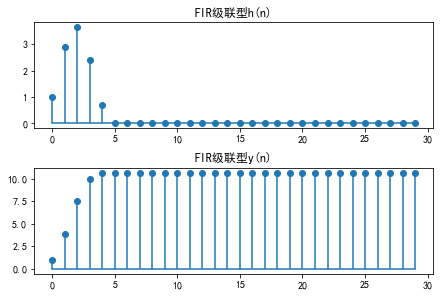

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#parameters of defference equation
A = 1;a = np.array([[1,0,0],[1,0,0]]) #denominator
b = np.array([[1,1.72,0.81],[1,1.17,0.85]]) #numerator

#input signal
M = a.shape[0];N = 30
delta = signal.unit_impulse(N) #unit sample signal
y = np.ones(N) #unit step signal

#FIR casfilter
z1 = np.zeros((M+1,N));z2 = np.zeros((M+1,N));
z1[0,:] = delta;z2[0,:] = y; 
for i in range(M): #循环滤波，计算最终结果
    zi = signal.lfilter_zi(b[i,:],a[i,:])*0 #zero initial condition
    z1[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z1[i,:],zi=zi);
    z2[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z2[i,:],zi=zi);

#plot
fig,axs = plt.subplots(2,1,constrained_layout=True)
axs[0].stem(A*z1[M,:],basefmt="");axs[1].stem(A*z2[M,:],basefmt="")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axs[0].set_title('FIR级联型h(n)');axs[1].set_title('FIR级联型y(n)')
plt.show();fig.savefig('./fir_cas_sequence.png',dpi=500)
